In [ ]:
#Elham Sadeghi March2023

In [1]:
pwd

'e:\\AutomatedFeatureExtraction-VAE'

In [1]:
from matplotlib.pyplot import axis
import torch
import numpy as np
import pandas as pd
from sequenceModel import SequenceModel
from sequenceDataset import SequenceDataset
import time
import os
import sys
import json
from matplotlib.pyplot import axis
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from sequenceModel import SequenceModel
from sequenceDataset import SequenceDataset
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd

def get_wavelength_arr(data):
    """Basic wrapper for accessing wavelength array from data array"""
    wavelength = data['Wavelen']
    return wavelength


def get_lii_arr(data):
    """Basic wrapper for accessing local integrated intensity array from data array"""
    lii = data["LII"]
    return lii


def get_ohe_data(data):
    """Wrapper function that accesses one hot encoded array from data array and returns it as a pytorch tensor"""
    # ohe_data = torch.from_numpy(data['ohe'])
    ohe_data = data['ohe']
    return ohe_data

def unpack_and_load_data(path_to_file: str, path_to_model: str):
    """This function is used as a wrapper function to load the .npz file that stores the wavelength, LII and one
    hot encoded arrays and load the trained model used for sampling. Both the data file and model are returned
    as objects."""
    data_file = np.load(path_to_file)
    model = torch.load(path_to_model)
    return data_file, model

def encode_data(ohe_sequences: object, model: object):
    """This is a wrapper function for the encode() function that can be found in sequenceModel.py. This simply calls
    that function and returns the latent distribution that is produced in the latent space."""
    ohe_sequences = torch.from_numpy(ohe_sequences)
    print(len(ohe_sequences))
    latent_dist = model.encode(ohe_sequences)
    return latent_dist


In [2]:

model = torch.load("./models/weighted/a0.003lds17b0.007g2d1h15.pt")

dataset = SequenceDataset(datafile = 'data-and-cleaning/cleandata.csv')

#filtering nir and green
#sequences = dataset.dataset.loc[dataset.dataset["Wavelen"]>800,'Sequence']

sequences = dataset.dataset.loc[dataset.dataset["LII"]<2.5890921512,'Sequence']


#filtering other wave
# dataset1 = dataset.dataset.loc[dataset.dataset["Wavelen"]>660,['Sequence','Wavelen']]
# sequences = dataset1.loc[dataset1["Wavelen"]<=800,'Sequence']

#the OG alex onehot encoding 1 liner
oheSeqs = dataset.transform_sequences(sequences.apply(lambda x: pd.Series([c for c in x])).to_numpy())

# dataclean = SequenceDataset(datafile=datafile_clean, split=[0.85, 0.15])

# data, model = unpack_and_load_data(datafile, modelfile)


latent_dist = encode_data(oheSeqs, model)

mean_matrix = latent_dist.mean.detach().numpy()

z_wav = mean_matrix[:,0]
z_lii = mean_matrix[:,1]

47


In [3]:
l = len(oheSeqs)
nir_ohe = []
cols = ['p1','p2','p3','p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10']
events = pd.DataFrame(columns=(cols))
nir_z = []

for i in range(l):
    if True:#Wavelen[i] > 800:
        nir_ohe.append(oheSeqs[i])
        #nir_z.append(z_wav[i])
        nir_z.append(z_lii[i])
        dict = {}
        for j in range(10):
            col = 'p'+ str(j+1)
            dict[col] = oheSeqs[i][j]
            # print(col, ohe_data[i][j])
        events = events.append(dict, ignore_index = True)

C:\Users\Tiba_Rayaneh\AppData\Local\Temp\ipykernel_1292\3006425514.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  events = events.append(dict, ignore_index = True)
C:\Users\Tiba_Rayaneh\AppData\Local\Temp\ipykernel_1292\3006425514.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  events = events.append(dict, ignore_index = True)
C:\Users\Tiba_Rayaneh\AppData\Local\Temp\ipykernel_1292\3006425514.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  events = events.append(dict, ignore_index = True)
C:\Users\Tiba_Rayaneh\AppData\Local\Temp\ipykernel_1292\3006425514.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  events = event

In [4]:
from itertools import combinations
from math import comb
def powerset(string):
    ret = []
    for i in range(0,len(string)+1):
        for element in combinations(string,i):
            # print(''.join(element))
            ret.append(list(element))
    return ret

def calcV(arr, nir):
    # ohe = [ [0]*4 for _ in range(10) ]
    ohe = np.zeros([1,10,4])
    if len(arr) > 0:
        for i in range(len(arr)):
            ohe[0][ arr[i]-1 ] = nir[ arr[i]-1 ]

    ohe_sequences = torch.from_numpy(ohe)
    latent_dist = model.encode(ohe_sequences)

    mean_matrix = latent_dist.mean.detach().numpy()

    z_wav = mean_matrix[:,0]
    z_lii = mean_matrix[:,1]

    # print(z_wav[0])
    # return z_wav[0]


    return z_lii[0]
    # print(ohe)
    # return ohe

In [5]:

N = list(range(1,10+1))
S = powerset(N)

nir_shap = [[] for _ in range(len(oheSeqs))]

In [6]:
# df_position = pd.read_csv("/content/single_char_shapley.csv")
df_com = pd.read_csv("unstr/NIR_LII_bottom 30 percent_gaussian_shapley_values.csv")

# print(df_position.shape)
print(df_com.shape)


(47, 1024)


In [7]:
all_count = {"A":np.zeros((10,)), "C":np.zeros((10,)),"T":np.zeros((10,)),"G":np.zeros((10,))}

for i in range(len(sequences)):

  z = list(sequences.iloc[i].strip(""))
  for j in range(10):
    temp = all_count[z[j]]
    temp[j]= temp[j]+1
    all_count[z[j]] = temp#all_count[z[j]]


# for i in range(5):

#   z = list(sequences.iloc[top5[i]].strip(""))
#   for j in range(10):
#     temp = all_count[z[j]]
#     temp[j]= temp[j]+1
#     all_count[z[j]] = all_count[z[j]]


Text(0, 0.5, 'Count')

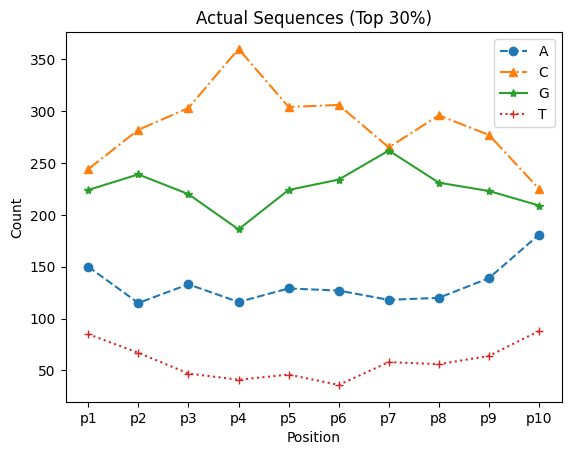

In [8]:
# #100*(all_count["A"]/len(sequences)
# plt.plot(100*(all_count["A"]/len(sequences)),marker="o",linestyle="--",label="A" )
# plt.plot(100*(all_count["C"]/len(sequences)),marker="^",linestyle="-.",label="C")
# plt.plot(100*(all_count["G"]/len(sequences)),marker="*",linestyle="solid",label="G")
# plt.plot(100*(all_count["T"]/len(sequences)),marker="+",linestyle="dotted",label="T")

# plt.title("Actual Green Sequences")
# plt.legend()
# # plt.ylim(0,100)
# plt.xticks([i for i in range(10)],['p1','p2','p3','p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10'])
# plt.xlabel("Position")
# plt.ylabel("Percent%")


plt.plot(all_count["A"],marker="o",linestyle="--",label="A" )
plt.plot(all_count["C"],marker="^",linestyle="-.",label="C")
plt.plot(all_count["G"],marker="*",linestyle="solid",label="G")
plt.plot(all_count["T"],marker="+",linestyle="dotted",label="T")

plt.title("Actual Sequences (Top 30%)")
plt.legend()
# plt.ylim(0,100)
plt.xticks([i for i in range(10)],['p1','p2','p3','p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10'])
plt.xlabel("Position")
plt.ylabel("Count")

In [8]:
col =[]
sub_val  = []
sub_v  = []

for i in range(len(sequences)):

  z = np.array(list(sequences.iloc[i].strip("")))
  col.append(sequences.iloc[i])
  com_value = df_com.iloc[i,:]
  sub_val  = []
  com_value_top5 = sorted(range(len(com_value)), key=lambda i: com_value[i])[::-1]#[:5]
  # temp = np.array(["*" for i in range(10)])
  # chek = "".join(temp)
  for k in range(len(com_value_top5)):
    temp = np.array(["*" for i in range(10)])

    try:
      idx = np.array(S[com_value_top5[k]])-1
      temp[idx]= z[idx]
      # print("".join(temp))
      # if chek!= "".join(temp):
      sub_val.append("".join(temp))
        # chek = "".join(temp)
    except:

      sub_val.append(" ")
  sub_v.append(sub_val)


In [9]:
sub_v = np.array(sub_v)

In [10]:
df = pd.DataFrame(sub_v.T,columns=(col))

#df.to_csv("stratified model-Shapley/Green/NewModel-Green-gaussian-subsequences.csv", index = False)

In [11]:
df.head(10)

,GGGGCCCGGT,CTACGAGATG,TCTCGGGTTA,TTAGCGAAGA,AAAAAAGCGA,AGGACTGGCC,GATTATACCC,GCGTGCCCAG,AGTCCATTTA,CTCCTTGGCG,...,AACGGAGATT,CGTTAAATAC,TGACCACGTA,GGGACAGGAA,ATCCGGGGGA,AATGACGTAC,CCAACGAGAA,AGCGACGCCC,GGGACCGGAA,GAATCCTCAA
0,*********T,***C******,***C******,*T********,*********A,***A******,**T*A*****,********A*,****C*****,***C****C*,...,*********T,****A*****,******C***,****C*****,***C******,*****C****,****C*****,********C*,***A******,**A*******
1,****C****T,*T********,*C********,*T**C*****,**A*******,*********C,*A**A*****,**G*****A*,**T*C*****,***C******,...,**C*******,**T*A*****,*****AC***,***A******,*T*C******,*******T**,***A******,******G***,***AC*****,********A*
2,*******G*T,***C*****G,**T*******,****C*****,**A******A,**G*******,*A**A*A***,*****C**A*,A***C*****,********C*,...,**C******T,***TA*****,****C*C***,***AC*****,**C*******,*********C,C***C*****,******GCC*,***A**G***,**A*****A*
3,G*********,***C****T*,****G*****,**A*C*****,*A*******A,**GA******,**T*******,**G*G***A*,****CA**T*,*T********,...,*******A*T,***TAA****,**A***C***,***A****A*,*T********,**T*******,***AC*****,******GC**,***A****A*,*AA*******
4,G***C****T,C**C******,**TC******,*TA*C*****,A********A,***A**G***,**T*A*A***,********AG,****C**TT*,***C**G*C*,...,A*C*******,**T*A**T**,***C*AC***,**GA******,*T*C***G**,*A*****T*C,**A*C*****,*****CG*C*,***AC***A*,**A*C*****
5,*****CC**T,*T*C****T*,*C*C******,T***C*****,*AA*******,*GGA******,****A*****,**G*G*****,****C***T*,******G*C*,...,**C*****T*,***TA**T**,******C*TA,***AC***A*,AT*C******,*A*******C,C**AC*****,******G*C*,***A*C****,*A********
6,********GT,**AC****T*,**TC*****A,*TA*******,*A*****C*A,***AC*****,******A***,****GC**A*,****CA****,*T*C******,...,A*CG*A*A*T,****A**T**,***C**C***,***A**G***,*T*C**G***,****AC*T**,C*A*******,A****CGC**,***AC*G***,**A****CA*
7,****C***GT,********T*,TCT*****T*,*T*******A,**A*****GA,A*GA******,***TA*A***,****G***A*,**T*******,***C*T**C*,...,A*CG*AGA*T,**T*A****C,T*****C***,**G*****A*,ATCC******,*****C*T**,**AA***G**,A****CG***,***A*C**A*,**AT******
8,******C**T,*T*C******,TC******TA,*TA******A,***A****GA,**GAC*****,**T*A*AC**,***T****A*,A***C**TT*,**C*****C*,...,A*C******T,**TTA*****,*****AC**A,**GAC*****,*TC*******,*A***C*T*C,C*********,*****CGCC*,*****C**A*,*AA*****A*
9,G********T,*TAC****T*,TCT*****TA,*TA*C****A,A*AA*AG*GA,A**A**G***,**T***AC**,**G**C****,****C*T*T*,*T*C**G***,...,*AC****A*T,***TA*A***,T**C**C***,**G*C*****,*T*CG*****,*A***C***C,***A***G**,*****C**C*,**GAC*****,**A*C***A*


In [12]:
Top_k = 20
pwm = np.zeros((4, df.shape[1]))


for k in range(df.shape[1]):

    for i in range(Top_k):
        row_i = list(df.iloc[i, k].strip(""))
        if len(row_i)== 10:

          for j in range(10):
              aa = row_i[j]
              if aa == 'A':
                  pwm[0][k] += 1
              elif aa == 'C':
                  pwm[1][k] += 1
              elif aa == 'G':
                  pwm[2][k] += 1
              elif aa == 'T':
                  pwm[3][k] += 1


pwm = pwm / np.sum(pwm, axis=0)


print(pwm)


[[0.         0.2        0.14754098 0.33928571 0.75757576 0.4
  0.55737705 0.29787234 0.22807018 0.         0.56060606 0.44444444
  0.40816327 0.5106383  0.26229508 0.57894737 0.15625    0.10526316
  0.2        0.57627119 0.22       0.41818182 0.34042553 0.3943662
  0.4        0.140625   0.40740741 0.21568627 0.78       0.6
  0.         0.37037037 0.33333333 0.42       0.43055556 0.51923077
  0.32786885 0.45652174 0.49122807 0.36538462 0.48076923 0.1
  0.31666667 0.48214286 0.12698413 0.45283019 0.74468085]
 [0.31481481 0.34545455 0.27868852 0.17857143 0.06060606 0.21818182
  0.19672131 0.17021277 0.36842105 0.59615385 0.1969697  0.
  0.46938776 0.42553191 0.32786885 0.38596491 0.390625   0.45614035
  0.38       0.27118644 0.28       0.45454545 0.25531915 0.38028169
  0.31428571 0.203125   0.22222222 0.15686275 0.04       0.15384615
  0.5        0.         0.44444444 0.42       0.22222222 0.48076923
  0.32786885 0.18478261 0.07017544 0.46153846 0.23076923 0.35
  0.35       0.42857143 0.

In [13]:
pwm.shape

(4, 714)

In [13]:
all_count = {"A":np.zeros((10,)), "C":np.zeros((10,)),"T":np.zeros((10,)),"G":np.zeros((10,))}



for i in range(df_com.shape[0]):

  z = list(sequences.iloc[i].strip(""))
  com_value = df_com.iloc[i,:]
  com_value_top5 = sorted(range(len(com_value)), key=lambda i: com_value[i])[::-1][:20]#[:x] x is topx e.g.[:10]is top10
  for j in range(1,11):

    for k in range(len(com_value_top5)):

      if j in S[com_value_top5[k]]:

        temp = all_count[z[j-1]]
        temp[j-1]= temp[j-1]+1
        all_count[z[j-1]] = temp

In [16]:
print(max(all_count['A']))
print(max(all_count['C']))
print(max(all_count['G']))
print(max(all_count['T']))
maximum= max(max(all_count['A']),max(all_count['C']),max(all_count['G']),max(all_count['T']))
print(maximum)

72.0
181.0
255.0
104.0
255.0


In [16]:
maximum= max(max(all_count['A']),max(all_count['C']),max(all_count['G']),max(all_count['T']))
maximum

162.0

In [17]:
(len(sequences))*5

785

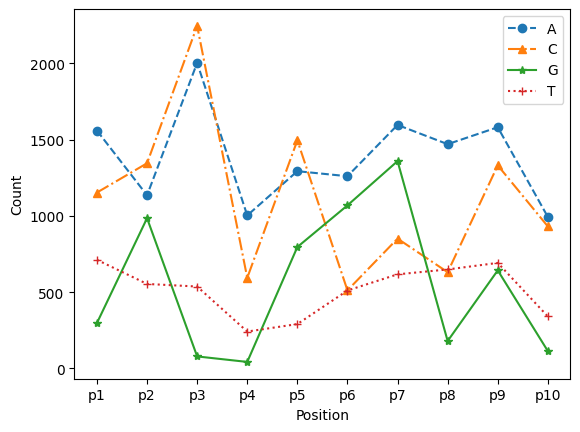

In [21]:
plt.plot(all_count["A"],marker="o",linestyle="--",label="A" )
plt.plot(all_count["C"],marker="^",linestyle="-.",label="C")
plt.plot(all_count["G"],marker="*",linestyle="solid",label="G")
plt.plot(all_count["T"],marker="+",linestyle="dotted",label="T")
#plt.title(" Top 20 Sub-sequences (Green)")
plt.legend()
# plt.ylim(0,100)
plt.xticks([i for i in range(10)],['p1','p2','p3','p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10'])
#plt.yticks(range(0,400,25))
plt.xlabel("Position")
plt.ylabel("Count")
plt.savefig("stratified model-Shapley/Green/NewModel-Green-linegraph.pdf", format='pdf')

In [16]:
print("Number of Green Sequences:", len(sequences))
print("Number of Green Sub-Sequences:", (len(sequences))*5)
print("A:", all_count["A"])
print("C:", all_count["C"])
print("T:", all_count["T"])
print("G:", all_count["G"])

Number of Green Sequences: 189
Number of Green Sub-Sequences: 945
A: [118.  76. 127. 240. 306. 153.  89. 156.  95. 415.]
C: [ 66. 471. 854. 820. 583. 354. 816. 723. 154. 506.]
T: [ 66.  29.  18.  59.  27.  22. 181. 191.  33.  70.]
G: [380. 401. 125. 173.  80. 293. 157. 277. 223.  20.]


In [14]:
p = []
for i in range(10):
    p.append(all_count["A"][i] + all_count["C"][i] + all_count["T"][i] + all_count["G"][i])


In [ ]:
count_A = [(all_count["A"][i] / p[i]) for i in range(10)]
count_C = [(all_count["C"][i] / p[i]) for i in range(10)]
count_T = [(all_count["T"][i] / p[i]) for i in range(10)]
count_G = [(all_count["G"][i] / p[i]) for i in range(10)]


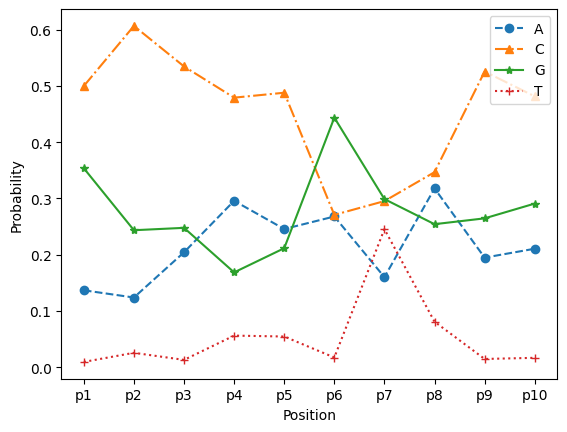

In [18]:
plt.plot(count_A,marker="o",linestyle="--",label="A" )
plt.plot(count_C,marker="^",linestyle="-.",label="C")
plt.plot(count_G,marker="*",linestyle="solid",label="G")
plt.plot(count_T,marker="+",linestyle="dotted",label="T")
#plt.title("Top 20 Sub-sequences (Dark Green)")
plt.legend()
# plt.ylim(0,100)
plt.xticks([i for i in range(10)],['p1','p2','p3','p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10'])
#plt.yticks(range(0,400,25))
plt.xlabel("Position")
plt.ylabel("Probability")
plt.savefig("stratified model-Shapley/Green/NewModel-Green-linegraph1.pdf", format='pdf')

In [16]:
products_list = [['A', all_count["A"]], ['C', all_count["C"]], ['T', all_count["T"]], ['G', all_count["G"]]]

df = pd.DataFrame(products_list, columns=['Base', 'position_count'])
#df.to_csv('stratified model-Shapley/Green/NewModel-Green Top 20 Sub-sequences_position_count.csv')

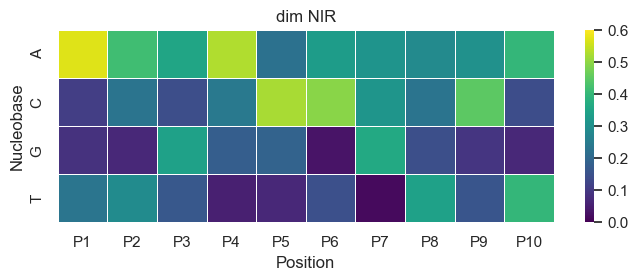

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_A = count_A
data_C = count_C
data_T = count_T
data_G = count_G

data = np.array([data_A, data_C, data_G, data_T])
nucleotides = ['A', 'C', 'G', 'T']
positions = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']


sns.set_theme()
plt.figure(figsize=(8, 2.5))


sns.heatmap(data, cmap="viridis", linewidths=0.5, xticklabels=positions, yticklabels=nucleotides, vmin=0, vmax=0.6)
plt.xlabel('Position')
plt.ylabel('Nucleobase')
#plt.title(r'NIR ($\lambda_p>800$ nm)')
plt.title('dim NIR')


plt.savefig("unstr/dim NIR.pdf", dpi=300, bbox_inches='tight', format='pdf')
plt.show()
# plt.savefig("BrightNIR.pdf", bbox_inches='tight', format='pdf')

